In [1]:
import librosa
import numpy as np
import glicol as gym

In [2]:
# !wget https://raw.githubusercontent.com/chaosprint/Dirt-Samples/master/808bd/BD0000.WAV

In [2]:
import IPython.display as ipd
ipd.Audio("./rm/RIM0.WAV")

In [3]:
target, sr = librosa.load("./rm/RIM0.WAV", sr=None)
dur = len(target) / sr
print(target, dur)

[0.57281494 0.54901123 0.12924194 ... 0.00231934 0.00109863 0.00091553] 0.04011337868480726


In [10]:
env = gym.make(
#     "~aa: sin 440",
    "~env: imp 0.1 >> envperc {} {}\n\naa: saw {} >> mul ~env",
    total_step=1,
    step_len=dur,
    target = target,
    action_space=[["lin", 0.0001, dur-0.0001], ["by", 0, lambda x: dur-0.0001-x], ["lin", 20, 2000]]
)

In [11]:
observation = env.reset()

In [12]:
action = env.action_space.sample()
print(action)

[0.0355535784824249, 0.004459800202382354, 929.6815981180121]


In [13]:
observation, reward, done, info = env.step(action)
print(observation, reward, done, info)

[ 0.         -0.00029193 -0.00052954 ...  0.          0.
  0.        ] -0.290129887519563 False hi


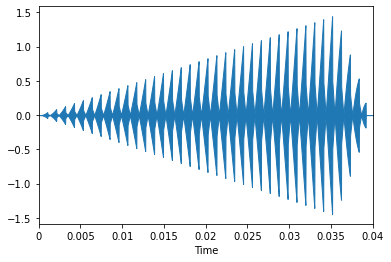

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
librosa.display.waveplot(observation, sr=sr)

In [15]:
ipd.Audio(observation, rate=sr)

◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎ 100.00%


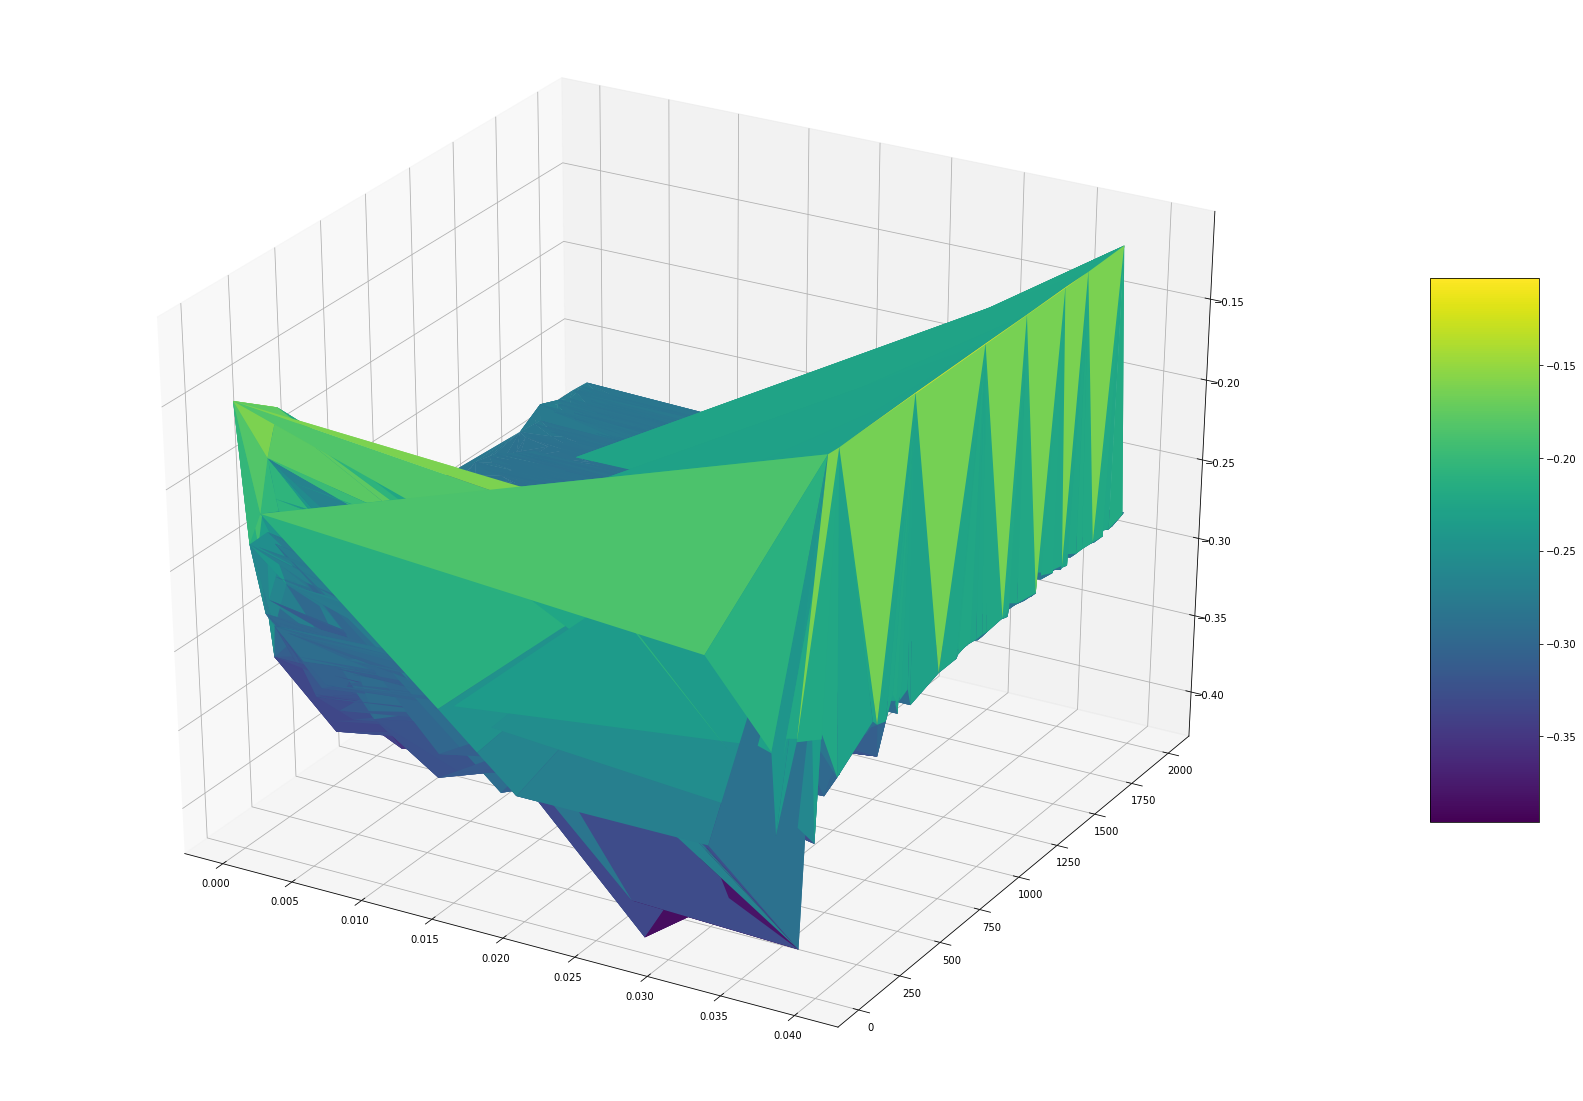

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import clear_output

freqs = []
attacks = []
rewards = []
epoches = 3000

for i in range(epoches):
    observation = env.reset()
    action = env.action_space.sample()
#     print(action[])
    freqs.append(action[2])
    attacks.append(action[0])
    observation, reward, done, info = env.step(action)
    rewards.append(reward)
    clear_output(wait=True)
    prog = (i+1)/epoches*100
    bar = "◼︎" * int(prog/5) + "◻︎" *(20 - int(prog/5));
    print(bar+" {0:.2f}%".format(prog))

fig = plt.figure(figsize=(30, 20))
ax = fig.gca(projection='3d')
ax.plot_trisurf(attacks, freqs, rewards, cmap=plt.cm.viridis, linewidth=0.2)
# plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(attacks, freqs, rewards, cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()